# Adversarial Variational Optimization: Poisson benchmark

In [1]:
import torch
import cag
import matplotlib.pyplot as plt

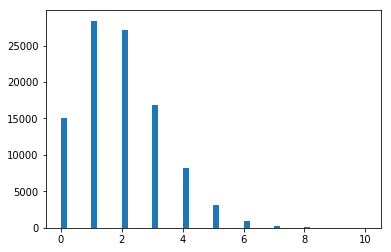

In [2]:
from cag.benchmark.poisson import allocate_observations

theta, x_o = allocate_observations(1.9)

plt.hist(x_o.numpy(), bins=50)
plt.show()

In [3]:
num_hidden = 50
discriminator = torch.nn.Sequential(
    torch.nn.Linear(1, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, 1),
    torch.nn.Sigmoid()
)

In [4]:
from cag.benchmark.poisson import PoissonSimulator as Simulator

simulator = Simulator()

In [5]:
from cag.proposal import NormalProposal

proposal = NormalProposal()

In [6]:
from cag.baseline import MeanBaseline

baseline = MeanBaseline(discriminator)

In [7]:
from cag.method import AdversarialVariationalOptimization

avo = AdversarialVariationalOptimization(simulator, discriminator, proposal)

In [8]:
proposal = avo.infer(x_o, num_steps=5000)

In [9]:
proposal._mu

tensor(1.9921, requires_grad=True)

In [10]:
proposal._sigma

tensor(0.2253, requires_grad=True)

In [11]:
theta

tensor([1.9000])

In [12]:
print(proposal.log_prob(theta).item())

0.487872838973999
